# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent import Agent
import sys

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
print(brain_name)
brain = env.brains[brain_name]

BananaBrain


In [5]:
type(brain)

unityagents.brain.BrainParameters

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [24]:
def runAgent(agent, env, episodes=500, t_steps=1000, eps_start=1, eps_min=0.000001, eps_decay=0.95, print_var = 5, train_mode = True):
    """Train Agent by playing simulator
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_min (float): multiplicative factor (per episode) for decreasing epsilon
        print_var (int): frequency to print out the results
    """
    eps = eps_start
    scores = [] 
    scores_window = deque(maxlen=100)
    
    
    for episode in range(episodes):

        env_info = env.reset(train_mode=train_mode)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0

        for t in range(t_steps):
            action = agent.act(state, eps)   # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step

            if done:                                       # exit loop if episode finished
                break
                
        scores_window.append(score) 
        scores.append(score) 
        eps = float(eps * eps_decay)
        eps = np.maximum(eps_min,eps)

        if episode % print_var == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tepsilon: {}'.format(episode, np.mean(scores_window),round(eps,6)), end="") 

        if episode % (print_var*5) == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tepsilon: {}'.format(episode, np.mean(scores_window),round(eps,6))) #  np.mean(scores_window)))

        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\tEpsilon: {:.2f}'.format(episode, np.mean(scores_window),round(eps,4)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_agent_weights.pth')
            break
    
    return scores

In [25]:
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
#agent = Agent(state_size=state_size, action_size=action_size, seed=0)
banana_collector_agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = runAgent(agent=banana_collector_agent, env = env, train_mode = True)
#runTraining()



Number of actions: 4
States have length: 37
Episode 0	Average Score: 0.00	epsilon 0.95
Episode 20	Average Score: 0.24	epsilon 0.340562
Episode 40	Average Score: 0.88	epsilon 0.122087
Episode 60	Average Score: 2.11	epsilon 0.043766
Episode 80	Average Score: 2.98	epsilon 0.015697
Episode 100	Average Score: 3.24	epsilon 0.005625
Episode 120	Average Score: 4.76	epsilon 0.002016
Episode 140	Average Score: 6.05	epsilon 0.000723
Episode 160	Average Score: 6.74	epsilon 0.000259
Episode 180	Average Score: 7.56	epsilon 9.3e-055
Episode 200	Average Score: 9.10	epsilon 3.3e-05
Episode 220	Average Score: 9.65	epsilon 1.2e-05
Episode 240	Average Score: 10.68	epsilon 4e-06
Episode 260	Average Score: 12.05	epsilon 2e-06
Episode 275	Average Score: 12.71	epsilon 1e-06
Environment solved in 278 episodes!	Average Score: 13.02	Epsilon: 0.00


In [ ]:
env.close()

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

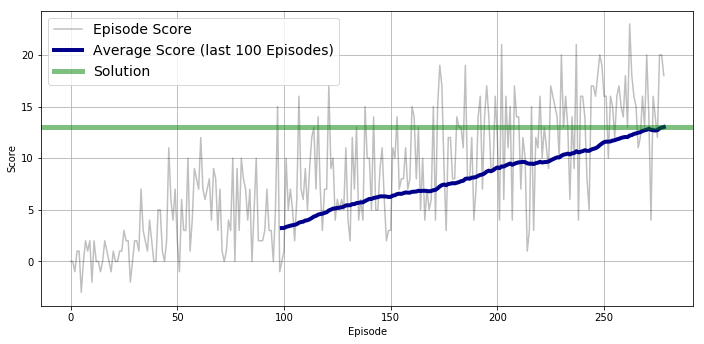

In [27]:
fig, ax = plt.subplots(1, 1, figsize=[10, 5])
plt.rcParams.update({'font.size': 14})

scores_rolling = pd.Series(scores).rolling(100).mean()
ax.plot(scores, "-", c="black", alpha=0.25)
ax.plot(scores_rolling, "-", c="darkblue", linewidth=4)
ax.set_xlabel("Episode")
ax.set_ylabel("Score")
ax.grid(which="major")
ax.axhline(13, c="green", linewidth=5, alpha=0.5)
ax.legend(["Episode Score", "Average Score (last 100 Episodes)", "Solution"])

fig.tight_layout()
fig.savefig("perfomance_plot.jpg")

In [37]:
# load the weights from file
banana_collector_agent.qnetwork_local.load_state_dict(torch.load('checkpoint_agent_weights.pth'))

for episode in range(1,6):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]   # get the next state
    score = 0 
    print('\rEpisode: {} ==============='.format(episode))
    for t_step in range(200):
        action = banana_collector_agent.act(state)
        env_info = env.step(action)[brain_name]
        state = env_info.vector_observations[0]   # get the next state
        done = env_info.local_done[0]                  # see if episode has finished
        
        reward = env_info.rewards[0]                   # get the reward        
        score += reward  
        print('\rt_step {}\tScore: {:.2f}'.format(t_step, score), end = "")
        
        if done:
            break            
    print('\rEpisode {}\tScore: {:.2f}'.format(episode, score))


Episode: 1 ===============
Episode 1	Score: 6.000
Episode: 2 ===============
Episode 2	Score: 11.000
Episode: 3 ===============
Episode 3	Score: 10.000
Episode: 4 ===============
Episode 4	Score: 15.000
Episode: 5 ===============
Episode 5	Score: 15.000
